# Notes
* This script reads the dataframes of GMRotD50 for three periods, and plots them compared to GMPEs.
* I multiply my synthetics with a coeffienct to calibrate them for Mw=7 (for Model 2 and Model 3); Model 1 is the reference model with a Mw=7.
* The models are the same as Oral et al. (2022; BSSA) https://doi.org/10.1785/0120220064

## Import library and set functions

In [48]:
%matplotlib notebook
import sys
import pandas as pd 
import matplotlib.pyplot as plt

###
def read_dataframe(picklename=None):
    try:
        df1 = pd.read_pickle(picklename)
        df = df1.copy()
        print ('df read:', picklename)
    except:
        import pickle5 as pickle
        with open(picklename, "rb") as fh:
            df1 = pickle.load(fh)
            df = df1.copy()
    return df
##

def plot_GMPE_comparison(gmpe=None,df=None,coeff=1.0,xrange=(0.5,20.01)):
    
#     cdt = (abs( df['y'] ) <= 50.0)
    xmin, xmax = xrange[0], xrange[1]
    ###
    plt.close('all')
    fig = plt.figure(figsize=(8,4))

    ax = fig.add_subplot(131)
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlabel('Closest distance to fault (km)')
    ax.set_ylabel('gm50 (g)')
    ax.set_title('T = 0.5 s')
    ax.set_xlim(xmin, xmax)
    # gmrot all stations
    ax.scatter(abs(df['R_rup'][:]), df['gm50_T0p5'][:]*coeff, c='salmon', ec='snow', alpha=0.5, lw=0.5)
    #
    # mean
    R, Sa = gmpe['Rrup (km)'].values, gmpe['0.5 s Mean'].values
    ax.plot(R, Sa, c='k', lw=0.5)
    # min
    R, Sa = gmpe['Rrup (km)'].values, gmpe['0.5 s Min'].values
    ax.plot(R, Sa, c='k', alpha=1.0, linestyle='--', lw=0.5)
    # max
    R, Sa = gmpe['Rrup (km)'].values, gmpe['0.5 s Max'].values
    ax.plot(R, Sa, c='k', alpha=1.0, linestyle='--', lw=0.5)
    ##

    ax = fig.add_subplot(132)
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlabel('JB distance (km)')
    ax.set_title('T = 1 s')
    ax.set_xlim(xmin, xmax)
    # gmrot all stations
    ax.scatter(abs(df['R_rup'][:]), df['gm50_T1'][:]*coeff, c='deeppink', ec='snow', alpha=0.5, lw=0.5)
    # mean
    R, Sa = gmpe['Rrup (km)'].values, gmpe['1.0 s Mean'].values
    ax.plot(R, Sa, c='k', lw=0.5)
    # min
    R, Sa = gmpe['Rrup (km)'].values, gmpe['1.0 s Min'].values
    ax.plot(R, Sa, c='k', alpha=1.0, linestyle='--', lw=0.5)
    # max
    R, Sa = gmpe['Rrup (km)'].values, gmpe['1.0 s Max'].values
    ax.plot(R, Sa, c='k', alpha=1.0, linestyle='--', lw=0.5)
    ##

    ###
    ax = fig.add_subplot(133)
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlabel('JB distance (km)')
    ax.set_title('T = 3 s')
    ax.set_xlim(xmin, xmax)
    # gmrot all stations
    ax.scatter(abs(df['R_rup'][:]), df['gm50_T3'][:]*coeff, c='olive', ec='snow', alpha=0.5, lw=0.5)
    # mean
    R, Sa = gmpe['Rrup (km)'].values, gmpe['3.0 s Mean'].values
    ax.plot(R, Sa, c='k', lw=0.5)
    # min
    R, Sa = gmpe['Rrup (km)'].values, gmpe['3.0 s Min'].values
    ax.plot(R, Sa, c='k', alpha=1.0, linestyle='--', lw=0.5)
    # max
    R, Sa = gmpe['Rrup (km)'].values, gmpe['3.0 s Max'].values
    ax.plot(R, Sa, c='k', alpha=1.0, linestyle='--', lw=0.5)
    ##
    plt.tight_layout()
    plt.show()
###

### Read dataframes

In [45]:
df_model1 = read_dataframe(picklename='./store/DF_Model1')
df_model2 = read_dataframe(picklename='./store/DF_Model2')
df_model3 = read_dataframe(picklename='./store/DF_Model3')

df read: ./store/DF_Model1
df read: ./store/DF_Model2
df read: ./store/DF_Model3


### Quick check of the content

In [46]:
df_model3

,name,x,y,z,r_epi,gm50_T0p5,gm50_T1,gm50_T3,R_rup
0,SC.st_000000,-60.0,-20.0,0.0,64.195015,0.155247,0.098000,0.032289,34.409301
1,SC.st_000001,-60.0,-19.0,0.0,63.890531,0.162346,0.100750,0.033658,33.837849
2,SC.st_000002,-60.0,-18.0,0.0,63.600314,0.167158,0.104885,0.035485,33.286634
3,SC.st_000003,-60.0,-17.0,0.0,63.324561,0.183243,0.108363,0.037356,32.756679
4,SC.st_000004,-60.0,-16.0,0.0,63.063460,0.194206,0.110908,0.039585,32.249031
...,...,...,...,...,...,...,...,...,...
4956,SC.st_004956,60.0,16.0,0.0,61.131007,0.129163,0.156060,0.035547,32.718979
4957,SC.st_004957,60.0,17.0,0.0,61.400326,0.122974,0.160625,0.034041,33.219446
4958,SC.st_004958,60.0,18.0,0.0,61.684682,0.117280,0.162468,0.032300,33.742134
4959,SC.st_004959,60.0,19.0,0.0,61.983869,0.117613,0.159169,0.030630,34.286026


### Read GMPE data

In [47]:
# READ GMPE
gmpe_file = '../m7_ss_ngaw2_bounds.csv'
gmpe = pd.read_csv(gmpe_file)  
# gmpe

### Plot GMPE comparisons for each model

### Model 1

<IPython.core.display.Javascript object>


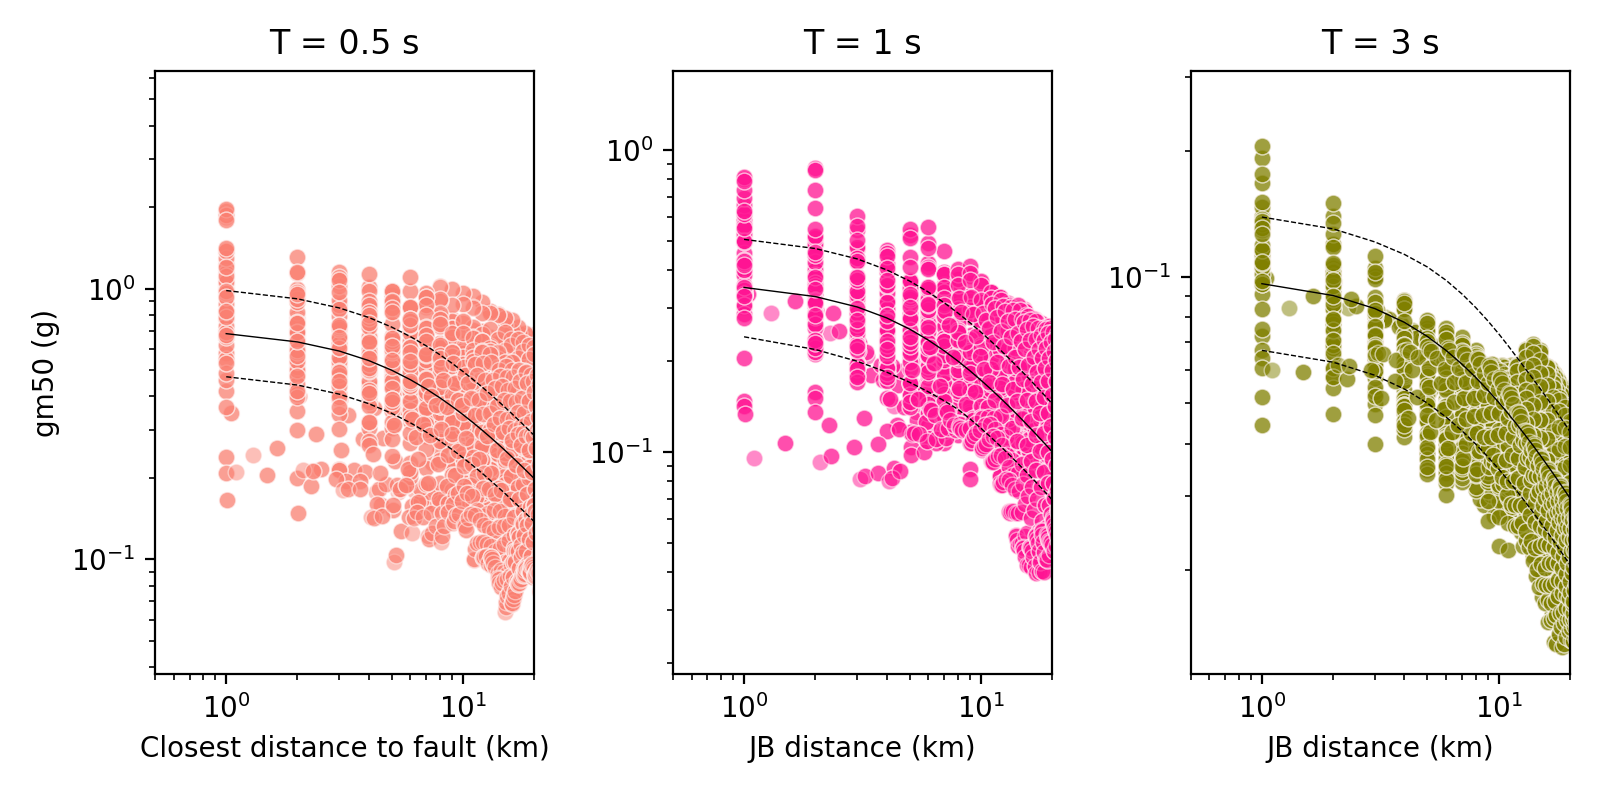

In [42]:
plot_GMPE_comparison(gmpe=gmpe,df=df_model1, coeff=1.0)

### Model 2

<IPython.core.display.Javascript object>


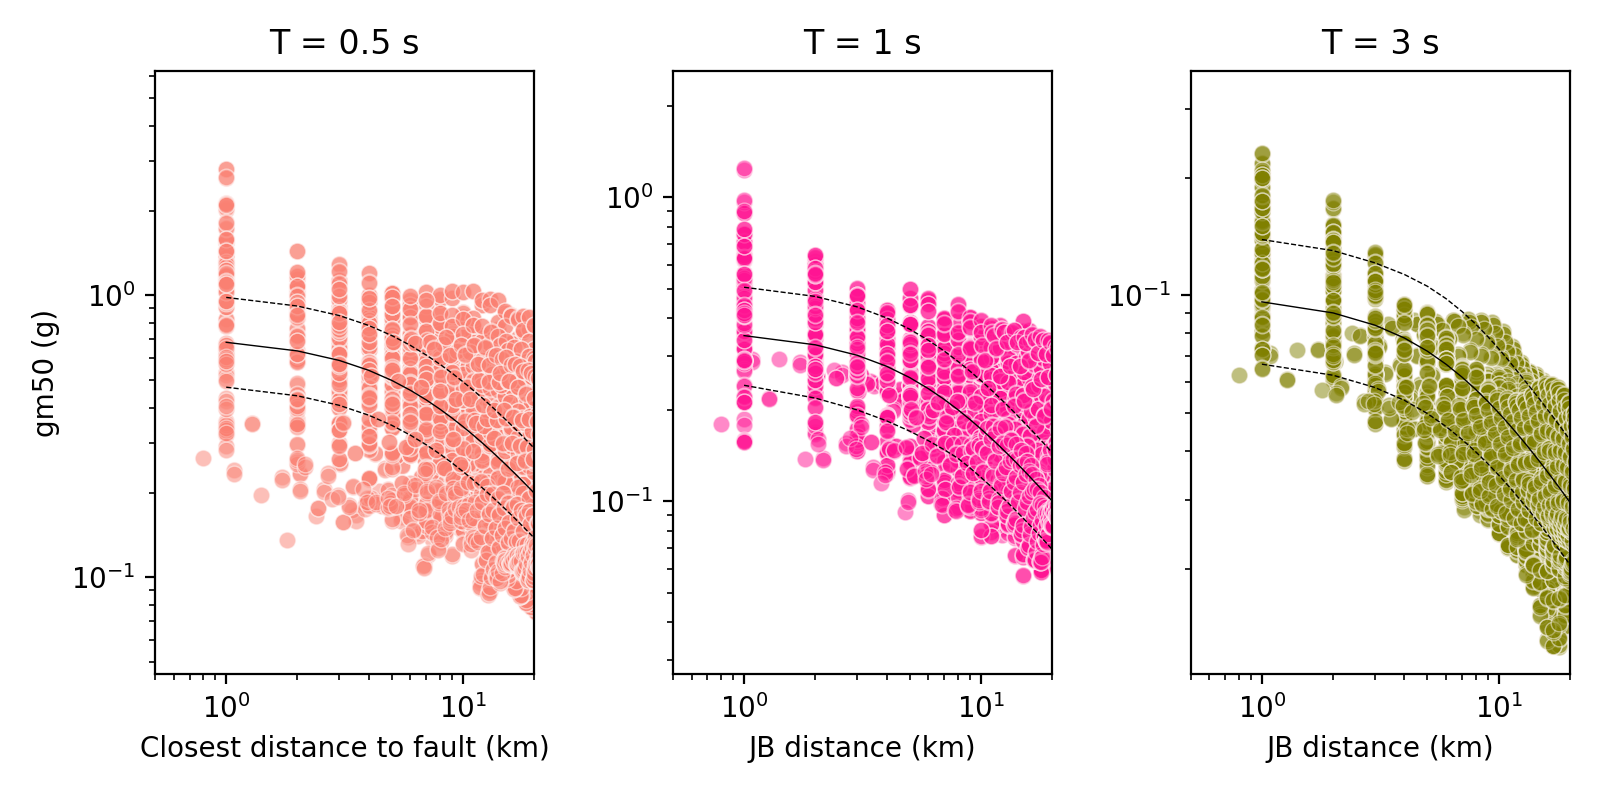

In [41]:
plot_GMPE_comparison(gmpe=gmpe,df=df_model2, coeff=0.9332543008149177)

### Model 3

<IPython.core.display.Javascript object>


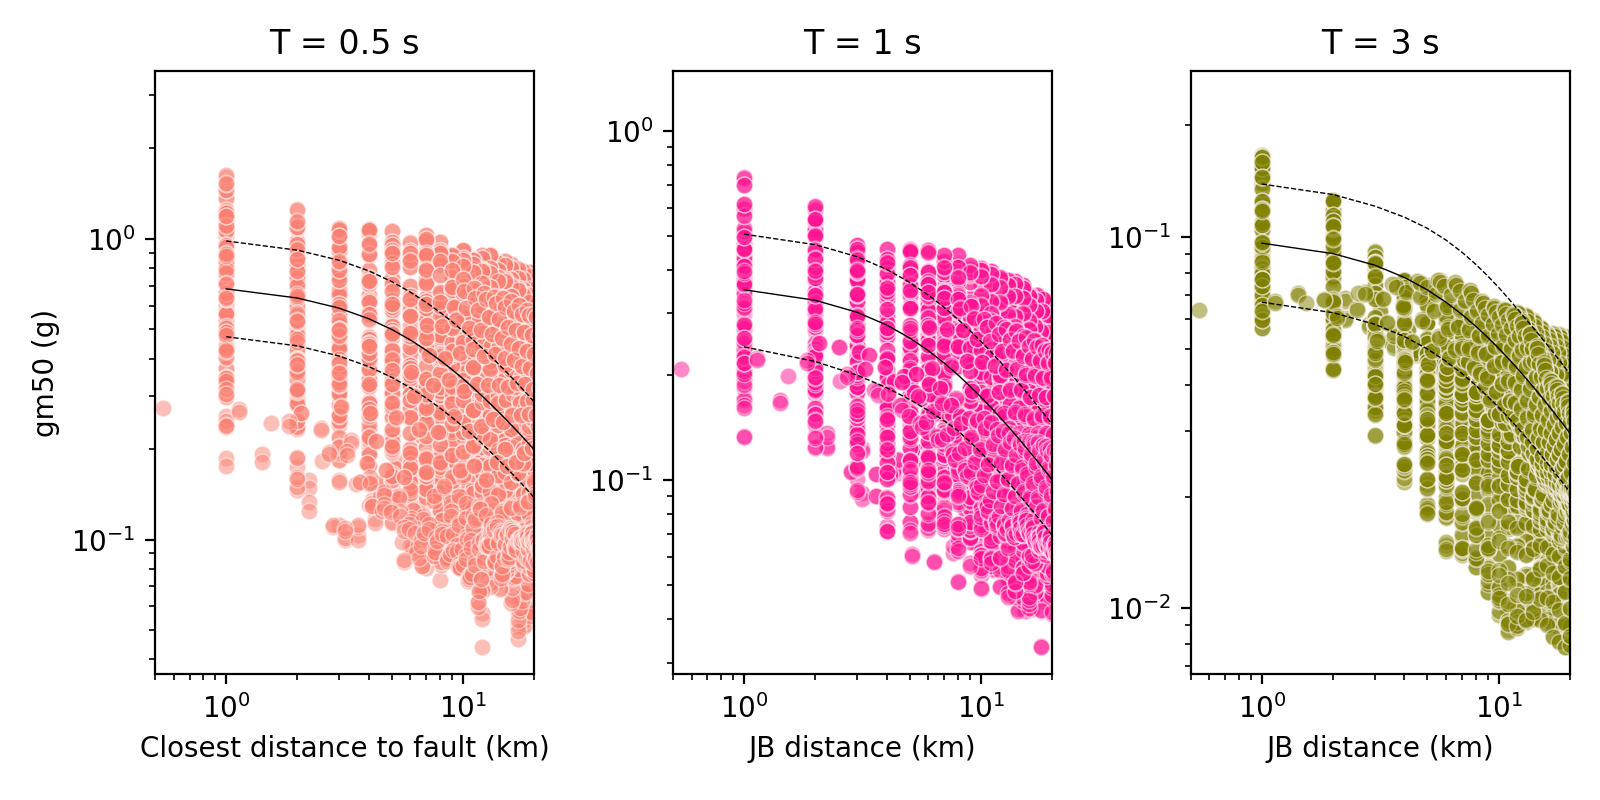

In [43]:
plot_GMPE_comparison(gmpe=gmpe,df=df_model3, coeff=0.6)

In [ ]:
#fin